# Test Python y Machine learning 


# Instrucciones


1. El formato de entrega es un documento en **.ipynb**, generado por jupyter.

2. Las respuestas a cada pregunta se deben escribir en los bloques que dicen **RESPUESTA A PREGUNTA X.X**. 

3. El Test es guiado pero use las librerías que estime conveniente

# Sobre el Test

En este Test, primero se debe realizar un análisis de datos y luego entrenar un clasificador de 3 maneras: 

* Entrenar/testear con los mismos datos,  

* Dividiendo el dataset en una parte para entrenar y otra para testear, y finalmente, 

* Usando cross-validation. Se verá accuracy, precision y recall para luego analizar los resultados. 


# Parte 1: Evaluar un clasificador

Usaremos el **Wine Dataset**, que viene en **scikit-learn**. Para ello, ejecutaremos la siguiente línea de código para cargar nuestro dataset.

In [49]:
from sklearn.datasets import load_wine
import pandas as pd
wine = load_wine()

features = pd.DataFrame(data=wine['data'],columns=wine['feature_names'])
data = features

## PREGUNTA 1.1

Indique lo siguiente:
* Tamaño del dataset. 
* ¿Cuántas clases son?
* ¿Qué nombre tienen las clases?
* ¿Cuántas instancias hay de cada clase?

Indique en cada caso cómo obtuvo la respuesta, es decir, adjunte código.

### RESPUESTA A PREGUNTA 1.1
* Tamaño del dataset: Este dataset tiene 178 filas (observaciones) y 13 columnas (features). La columna #14 la llamaremos "target", que es la que almacena la clasificación de los vinos.

* ¿Cuántas clases son?: Se tienen 3 clases.

* ¿Qué nombre tienen las clases?: class_0, class_1 y class_2.

* ¿Cuántas instancias hay de cada clase?: 59, 71 y 48 de las clases 0, 1 y 2, respectivamente.


In [50]:
# Tamaño del dataset
print(data.shape)

# ¿Cuántas clases son?
import numpy as np
print(np.unique(wine.target))

# ¿Qué nombre tienen las clases?
print(wine.target_names)

# ¿Cuántas instancias hay de cada clase?
unique, counts = np.unique(wine.target, return_counts=True)
print(np.asarray((unique, counts)).T)

data.head()

(178, 13)
[0 1 2]
['class_0' 'class_1' 'class_2']
[[ 0 59]
 [ 1 71]
 [ 2 48]]


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


## Pregunta 1.2

Explique qué hacen las siguientes líneas de código. 

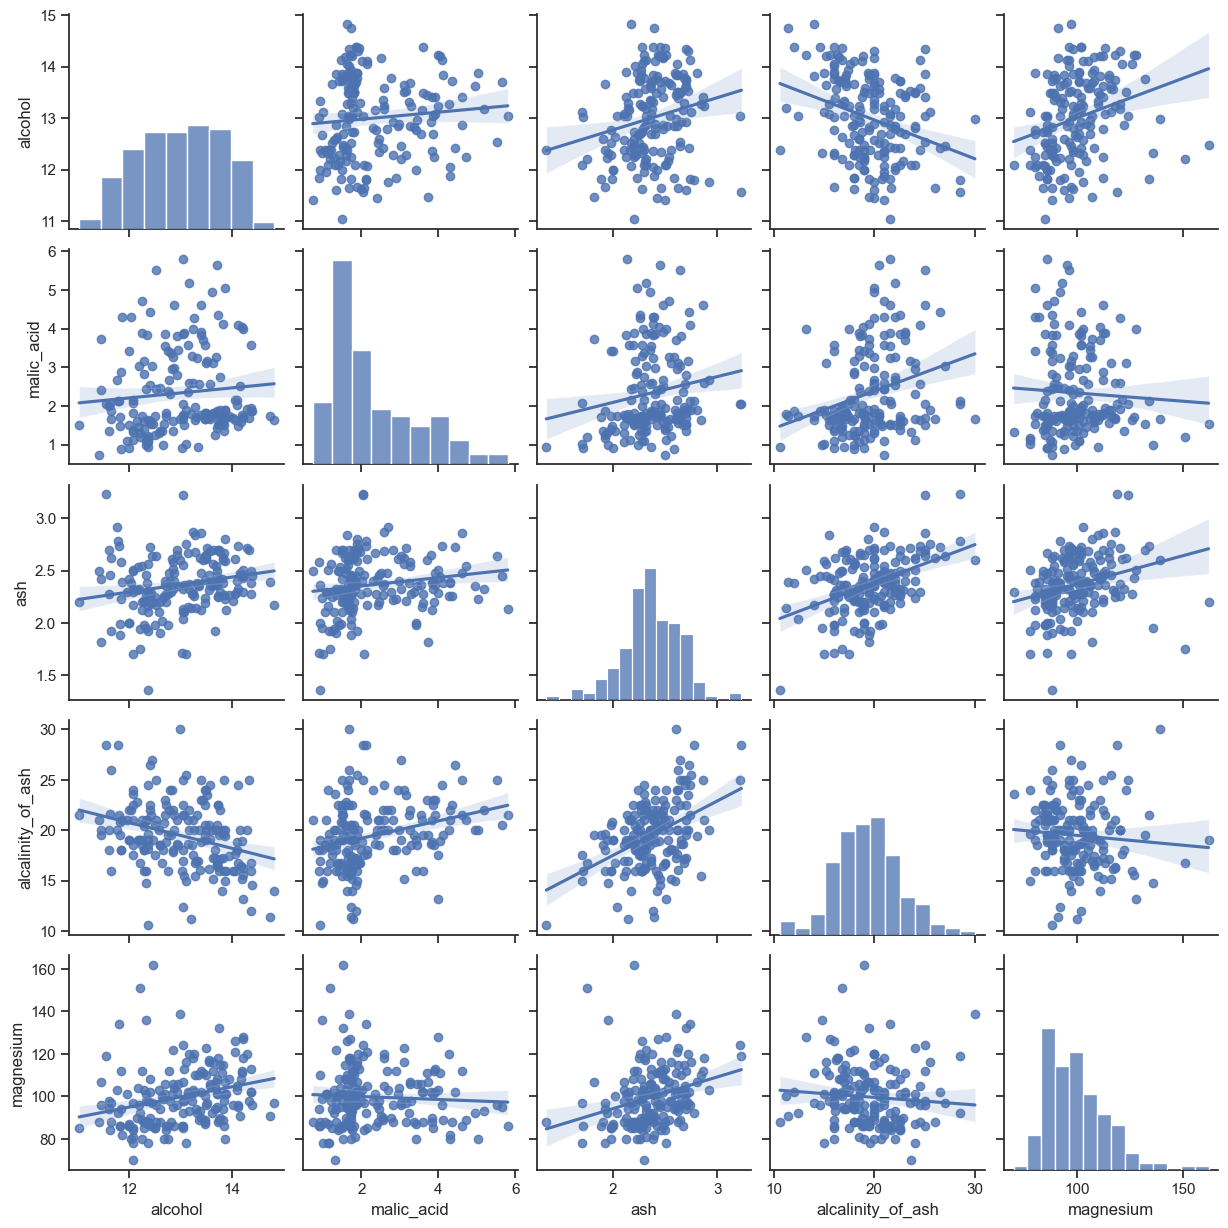

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)

wine = load_wine()

features = pd.DataFrame(data=wine['data'],columns=wine['feature_names'])
data = features
data['target']=wine['target']
data['class']=data['target'].map(lambda ind: wine['target_names'][ind])                               
                               

g = sns.pairplot(data.iloc[:, 0:5], kind='reg') # Parametro kind="reg" agrega una recta
plt.show()


## RESPUESTA A PREGUNTA 1.2
* Las primeras líneas repiten lo hecho en la pregunta 1.1 (importar librerías y cargar la tabla de wines).

* Luego se le agrega la columna de target, que son los valores 0, 1 y 2, que representan las 3 diferentes clases.

* Con la lambda function se agrega otra columna que mapea el nombre de las clases: “class_0”, “class_1” y “class_2".

* Por último se genera un pairplot o "gráfico de parejas" con las primeras 5 columnas de la data. La función de este conjunto de gráficos es mostrar usando dispersiones todas las relaciones posibles entre las variables y, empleando histogramas, se pueden visualizar las distribuciones de cada una de ellas.

* La línea recta en los gráficos de dispersión sirve para predecir los valores del eje "y", conociendo los del eje "x". La construcción de esta recta va asociada con un valor llamado R^2, el cual mide que tan correcto es el ajuste. Visualmente, mientras más separados estén los puntos de esta recta, más imprecisa será la predicción.


## Pregunta 1.3 

¿Cuáles son las observaciones principales que puede obtener de la visualización? Explique. 

### RESPUESTA A PREGUNTA 1.3
Histogramas:
* Las variables malic_acid y magnesium tienen una distribución con sesgo positivo. Es decir, los valores más pequeños se repiten más veces en la data.
* La variable "alcohol" tiende un poco más hacia una distribución uniforme.
* Las variables que más se aproximan a una distribución normal son: alcalinity_of_ash y ash. 

En cuanto a las dispersiones, las correlaciones más acentuadas que podemos ver en el gráfico son:
* A mayor ash, mayor alcalinity_of_ash
* A mayor contenido de magnesio (magnesium), mayor grado alcohólico (alcohol).
* A menor alcalinity_of_ash, mayor grado alcohólico (alcohol).

Por otro lado, podemos ver variables con correlaciones prácticamente neutras:
* alcalinity_of_ash y magnesium
* malic_acid y magnesium







# PARTE 2: Entrenar/testear con los mismos datos

Usaremos el clasificador **Decision Tree**, utilizando distintas formas de evaluación y vamos a compararlas mediante diversas métricas. 

## PREGUNTA 2.1

Usando el siguiente código, complete lo que falta para cargar los datos y entrenar el clasificador. Luego, muestre las métricas de accuracy, precision, recall y f1-score utilizando (X,y) como data y etiquetas respectivamente.

In [52]:
## RESPUESTA PREGUNTA 2.1

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
X = wine.data      ## datos, caracteristicas o features de cada vino. 
y = wine.target    ## clase para cada instancia anterior.

# .... COMPLETE ACA
clf.fit(X, y)
pred = clf.predict(X)
print(accuracy_score(y, pred))
print(classification_report(y, pred))


1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        71
           2       1.00      1.00      1.00        48

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178



## Pregunta 2.2

De acuerdo a las métricas obtenidas ¿Es buena la predicción? ¿Recomendaria utilizar este clasificador en una aplicacion para clasificar vinos?

### RESPUESTA A PREGUNTA 2.2
De acuerdo a las métricas la predicción es perfecta (todas las observaciones fueron predichas con su clase correspondiente). Sin embargo, no recomendaría utilizar este clasificador ya que no ha sido probado con data diferente a la del entrenamiento.

# Parte 3: Otra variante: Dividiendo el dataset para entrenar y testear

Ahora lo que haremos será dividir nuestro dataset en 70% entrenar (***training set***) y 30% para testear (***testing set***). Use la función ***train_test_split()*** y utilice las variables `X_train, X_test, y_train, y_test`.

## Pregunta 3.1

Escriba el código necesario para entrenar el modelo e indique el Accuracy, Precision y Recall del clasificador. 
Entrene usando el ***training set*** y pruebe sobre el ***testing set***, en base a la división 70%-30%, respectivamente ¿En qué se diferencian los resultados con respecto a la pregunta 2.1? Cual es mejor? Cual usaria en una aplicacion para clasificar vinos?

**NOTA: para dividir el dataset use el parámetro `stratify=y`.**


In [53]:
### RESPUESTA A PREGUNTA 3.1
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

clf_2 = DecisionTreeClassifier()
clf_2.fit(X_train, y_train)
pred_2 = clf_2.predict(X_test)
print(accuracy_score(y_test, pred_2))
print(classification_report(y_test, pred_2))




0.8703703703703703
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        18
           1       0.89      0.81      0.85        21
           2       0.88      1.00      0.94        15

    accuracy                           0.87        54
   macro avg       0.87      0.88      0.87        54
weighted avg       0.87      0.87      0.87        54



### RESPUESTA A PREGUNTA 3.1 Continuación
A pesar de obtener métricas de desempeño menores del 100%, la diferencia entre este modelo y el anterior es que en este sí se ha probado con nueva data. Los resultados de accuracy de 87% y, de precision y recall > 80% en las 3 clases, indican que este es un modelo aceptable.

Por estas razones, el segundo modelo es mejor, asi que lo escogería para clasificar vinos por encima del primero.



## Pregunta 3.2

El siguiente código muestra una funcion que genera una matriz de confusión de los resultados de clasificación de la pregunta 3.1. Ejecute el bloque y luego haga una llamada a la funcion *plot_confusion_matrix* con los resultados de la sección 3.1 para visualizar el gráfico. Interprete qué significa cada uno de los valores distintos de 0 en la matriz.

In [57]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import numpy as np

class_names = wine.target_names
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred) 
    
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
   
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

<AxesSubplot: xlabel='Predicted label', ylabel='True label'>

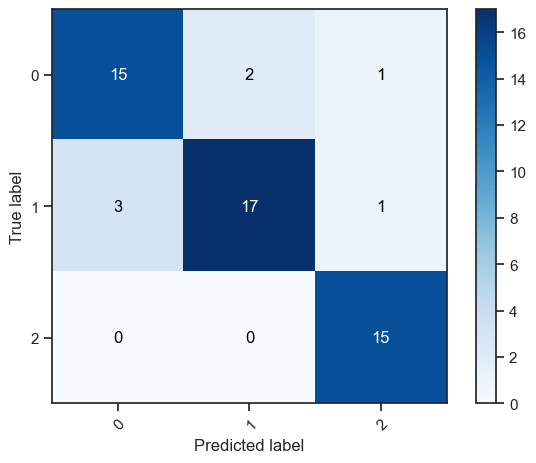

In [61]:
classes = unique_labels(y_test, pred_2)
plot_confusion_matrix(y_test, pred_2, classes)

### RESPUESTA A PREGUNTA 3.2
A partir de la matriz de confusión obtenida, tenemos que:
* Los valores en la diagonal representan las clases predichas correctamente. En líneas generales, mientras mayor sean estos números respecto a los que estén fuera de la diagonal, mejor es nuestro modelo.
* De los 18 vinos "clase 0" existentes en la data, 15 fueron predichos correctamente, 2 como "clase 1" y 1 como "clase 2"
* De los 21 vinos "clase 1" existentes en la data, 17 fueron predichos correctamente, 3 como "clase 0" y 1 como "clase 2"
* De los 15 vinos "clase 2" existentes en la data, todos fueron predichos correctamente








# PARTE 4: Cross-validation

Con cross-validation, el conjunto de entrenamiento se divide en $k$ conjuntos disjuntos; se entrena sobre los datos correspondientes a $k-1$ de éstos, y se evalúa sobre el conjunto restante. Esto se repite $k$ veces, evaluando siempre sobre un conjunto distinto. Teniendo en cuenta el parámetro $k$, a éste método se le llama $k$-fold cross-validation.

El código que está a continuación realizará 10-fold cross-validation usando Decision Tree sobre los datos. La forma de estimar el rendimiento del clasificador es, entre otras formas, calculando el promedio de todos los k-folds.

Además se muestra la predición sobre los datos para testear. 

In [72]:
## EJECUTAR ESTE BLOQUE

from sklearn.model_selection import cross_validate
import numpy as np

scoring = ['precision_macro', 'recall_macro', 'accuracy', 'f1_macro']
cv_results = cross_validate(clf, X, y, cv = 10, scoring = scoring, return_train_score= True)

print('Promedio Precision:', np.mean(cv_results['test_precision_macro']))
print('Promedio Recall:', np.mean(cv_results['test_recall_macro']))
print('Promedio F1-score:', np.mean(cv_results['test_f1_macro']))
print('Promedio Accucary:', np.mean(cv_results['test_accuracy']))

#Si quisieramos mostrar el resultado de cada k-fold, deberiamos quitar 
#la funcion np.mean para calcular el promedio. Esto mostraria una lista con el resultado de cada fold

print('Precision:', (cv_results['test_precision_macro']))
print('Recall:', (cv_results['test_recall_macro']))
print('F1-score:', (cv_results['test_f1_macro']))
print('Accucary:', (cv_results['test_accuracy']))

Promedio Precision: 0.8960786435786435
Promedio Recall: 0.8763492063492064
Promedio F1-score: 0.8659691017043958
Promedio Accucary: 0.8705882352941178
Precision: [0.8968254  0.88571429 0.79292929 0.8968254  0.85925926 0.88571429
 1.         0.95833333 0.93333333 0.85185185]
Recall: [0.8968254  0.88571429 0.63809524 0.9047619  0.82222222 0.88571429
 1.         0.94444444 0.95238095 0.83333333]
F1-score: [0.89177489 0.88571429 0.60281549 0.88850039 0.83038721 0.88205128
 1.         0.94747475 0.93732194 0.79365079]
Accucary: [0.88888889 0.88888889 0.66666667 0.88888889 0.83333333 0.88888889
 1.         0.94444444 0.94117647 0.76470588]


## Pregunta 4.1

Comente el resultado obtenido y compare los valores de las métricas con respecto a lo obtenido en la pregunta 3.1 ¿Qué beneficios tiene emplear cross-validation?


### RESPUESTA PREGUNTA 4.1
Comparando métricas de la pregunta 3.1 (macro avg.) vs 4.1:
* Precisión: 0.87 vs 0.90
* Recall: 0.88 vs 0.88
* F1-score: 0.87 vs 0.87
* Accuracy: 0.87 vs 0.87

Los resultados son bastante similares, como de esperarse. El beneficio de aplicar cross-validation es verificar que el modelo está apto para predecir utilizando data que no conoce, ya que se usaron "k" (10, en este caso) segmentos de la data para el testeo. Este beneficio es mucho más crucial cuando se tiene poca data, como lo es en este caso (apenas 178 observaciones)

# PARTE 5: Comparación de modelos

## Pregunta 5.1

Respecto a los 3 tipos de experimentos, ¿qué tipo de evaluación considera que es el mejor y por qué? (Refiérase a tamaño del dataset, distribución de clases, entre otras cosas.)


### RESPUESTA A PREGUNTA 5.1
* Cross-validation es una buena opción cuando se dispone de un conjunto de datos pequeño, ya que permite aprovechar al máximo la información disponible. También es útil cuando se tienen clases desbalanceadas, ya que asegura que todas las clases estén representadas en cada uno de los subconjuntos. Además, permite estimar el rendimiento del modelo de manera más confiable que otras técnicas.

* El método de train-test split es rápido, sencillo y adecuado para conjuntos de datos grandes. Sin embargo, puede ser problemático cuando se tienen clases desbalanceadas, ya que es posible que el conjunto de prueba no contenga suficientes ejemplos de algunas de las clases menos frecuentes.

* Entrenar y evaluar con los mismos datos no se recomienda para evaluar el desempeño de un modelo de ML porque no proporciona información sobre el rendimiento del modelo en nuevos datos.

Tomando en cuenta estos aspectos, cross-validation es el mejor tipo de evaluación para este caso ya que el dataset es pequeño y es el método de estimación de rendimiento más confiable. Train-test split puede ser una segunda opción ya que la distribución de clases no es desbalanceada (59, 71, 48).



## Pregunta 5.2

Entrene un clasificador empleando k-nearest neighbors (**KNN**) considerando 5 vecinos y cross validation de 10 folds. 

Compare el resultado de cross validation obtenido usando Decision Tree y KNN. ¿Hay algún efecto notorio en cuanto al desempeño de ambos clasificadores? ¿Se podría decir que uno es mejor que otro? Explique.

### RESPUESTA A PREGUNTA 5.2

In [70]:
# Para cargar KNN
from sklearn.neighbors import KNeighborsClassifier
K = 5 # numero de vecinos
knn = KNeighborsClassifier(n_neighbors=K)  

## AGREGUE CODIGO PREGUNTA 5.2
cv_results_5 = cross_validate(knn, X, y, cv = 10, scoring = scoring, return_train_score= True)

print('Promedio Precision:', np.mean(cv_results_5['test_precision_macro']))
print('Promedio Recall:', np.mean(cv_results_5['test_recall_macro']))
print('Promedio F1-score:', np.mean(cv_results_5['test_f1_macro']))
print('Promedio Accucary:', np.mean(cv_results_5['test_accuracy']))

#Si quisieramos mostrar el resultado de cada k-fold, deberiamos quitar 
#la funcion np.mean para calcular el promedio. Esto mostraria una lista con el resultado de cada fold

print('Precision:', (cv_results_5['test_precision_macro']))
print('Recall:', (cv_results_5['test_recall_macro']))
print('F1-score:', (cv_results_5['test_f1_macro']))
print('Accucary:', (cv_results_5['test_accuracy']))

Promedio Precision: 0.6652320827320827
Promedio Recall: 0.6584920634920635
Promedio F1-score: 0.645921660039307
Promedio Accucary: 0.6754901960784313
Precision: [0.6984127  0.66269841 0.6540404  0.68055556 0.65277778 0.58333333
 0.75555556 0.64920635 0.81111111 0.50462963]
Recall: [0.66825397 0.65714286 0.60952381 0.61269841 0.59365079 0.60952381
 0.6968254  0.64920635 0.82142857 0.66666667]
F1-score: [0.67482517 0.64285714 0.58377897 0.62564103 0.61010101 0.58571429
 0.70499109 0.64920635 0.81196581 0.57013575]
Accucary: [0.66666667 0.66666667 0.61111111 0.61111111 0.61111111 0.61111111
 0.72222222 0.66666667 0.82352941 0.76470588]


c:\Users\mauro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### RESPUESTA A PREGUNTA 5.2 (EXPLICACION)
Comparando las métricas de desempeño del modelo DT vs KNN, usando cross validation en ambas:
* Precisión: 0.90 vs 0.67
* Recall: 0.88 vs 0.66
* F1-score: 0.87 vs 0.65
* Accuracy: 0.87 vs 0.68

Claramente el desempeño de Decision Trees es mucho mejor, ya que supera en todas las métricas a KNN, por lo cual podemos decir que es una mejor selección de modelo para este problema.

Investigando, se pudo encontrar algunas razones por las cuales Decision Trees supera a KNN en este caso:
* KNN es más sensitivo a los outliers, ya que algoritmo basado en criterios de distancia.
* Para KNN se deben escalar los features, por la misma razón que el punto anterior (utilización de distancias euclideanas). Todas las features deben tener la misma escala, y en este problema no se realizó ese paso de pre-procesamiento.
* Los Decision Trees son más efectivos para capturar relaciones no lineales entre features.



## Pregunta 5.3

¿Probaría con otro algoritmo de clasificación? Explicitar cuál/es y por qué




### RESPUESTA A PREGUNTA 5.3
* Regrsión logística múltiple: debido a su facilidad de implementación. Además, la investigación indica que funciona bien con problemas de múltiples featues, como este en donde tenemos 13.
* Naive Bayes: este modelo también es de fácil implementación. Por otra parte, se basa en la suposición de que todas las características son independientes entre sí, lo cual se acopla a nuestro caso, ya que la existencia de un tipo de vino no depende de otro. Otro aspecto positivo es que este tipo de modelo no trabaja bien con features altamente correlacionadas, y en las primeras preguntas de esta prueba ya pudimos observar que no hay correlaciones muy marcadas.
* Support Vector Machine: Dado el pequeño tamaño del dataset, puede ser una opción viable en este caso ya que es un modelo computacionalmente costoso. Otro punto a favor es que puede manejar datos no lineales.

Dicho todo esto, no hay un modelo único que pueda determinarse solo por su características. Lo que se debe hacer es probar estos 3 y comparar las métricas de performance ya calculadas haciendo cross validation con Decision Trees y KNN.

# PARTE 6: Trabajo en proyectos

Suponga ahora que desde gerencia le piden generar un modelo para saber el impacto de un evento (evento deportivo, falla de servicios o proveedores, lanzamiento de bonos, etc.) en el flujo de chat center (cantidad de chats, tiempo de respuesta, capacidad de respuesta, etc.)

## Pregunta 6.1

Desarrolle los pasos que seguiría para realizar el modelo. Hable de los pasos que tomaría, que preguntas necesitaría hacer para desarrollarlo, que variables podría considerar (de manera general) y cualquier otro paso o comentario que encuentre relevante para poder llevarlo a cabo.

### RESPUESTA A PREGUNTA 6.1
1. El primer paso siempre será definir el objetivo del modelo, independientemente de cual sea el problema. En este caso, puede ser predecir las métricas de cuantos chats se recibirán y cuánto se tardará en responder esos chats.

2. Ahora debemos identificar las variables (features) relevantes a nuestro problema. Se proponen las siguientes: 
* Respecto a los chat centers: hora del día, día de la semana, nivel de complejidad del chat (duracion, número de palabras), años de experiencia del agente.
* Respecto a los eventos deportivos: tipos de eventos que ocurrieron durante las fechas con data de chats (relevancia, deporte, duración). 
* Respecto a la falla de los servicios: tipo de falla, duración de la misma.
* Respecto a los bonos: cantidad de bonos, monto de los bonos.

3. Recolectar los datos: buscar una cantidad suficiente de datos históricos para construir y validar el modelo. Es importante incluir datos tanto de los eventos pasados como de los momentos en los que no hay eventos.

4. Preparar los datos: Se deben limpiar y transformar los datos para que estén listos para el análisis. Esto puede incluir el ajuste de la escala de las variables (si los modelos a escoger lo requieren) y la creación de variables adicionales (feature engineering).

5. Análisis de datos: antes de empezar a entrenar un modelo, debemos realizar un análisis como el que efectuamos en las primeras preguntas de esta prueba (correlaciones y distribuciones)

6. Selección de los modelos a probar: para este caso la variable a predecir es numérica, por lo que se pueden probar regresiones lineales, decision trees, neural networks, KNN, etc.

7. Entrenar y evaluar el desempeño del modelo: separando la data en segmentos de training y test usando cross-validation para todos los tipos de modelo. Al final escogeremos el que mejor desempeño arroje, sea mas fácil de implementar y tenga un menor costo computacional.

8. Puesta en marcha del modelo: Se implementa el modelo en un entorno de producción y se realiza un monitoreo constante para detectar cualquier problema o cambio en el comportamiento del flujo de chat center. Por ejemplo, si cambia el comportamiento de los usuarios, la disponibilidad de los agentes, la complejidad de los chats o las políticas de respuesta. En esos casos se deberá estudiar la necesidad de actualizar los datos, identificar nuevas variables, re-entrenar el modelo y evaluar nuevamente su desempeño.

## Pregunta 6.2

Ahora suponga que el modelo anterior ya esta completamente listo y presenta increibles resultados. Según el proceso y modelo que escogió, como le explicaría al área comercial que debería implementarse su modelo? (considere que esta área tiene nulo conocimiento de métricas de desempeño de modelos)

### RESPUESTA A PREGUNTA 6.2

* Presentar los resultados: debe hacerse de una manera clara y fácil de entender, ilustrando los puntos claves. Por ejemplo, con cuanta precisión es capaz de predecir el numero de chats que se iniciaran en un periodo determinado.

* Después de presentar los resultados, debemos explicar como funciona el modelo y cómo se utilizó para llegar a las conclusiones presentadas. Usar el lenguaje mas sencillo posible, enunciando los pasos que describimos en la pregunta anterior.

* Luego se debe demostrar la relevancia del modelo para el área comercial, es decir, cómo puede ayudar a resolver los problemas y desafíos específicos. Podría hacer esto destacando los beneficios y ventajas que el modelo ofrece, como la capacidad de tomar decisiones más informadas y reducir los costos.


## Pregunta 6.3

Por último, la compañía queda contenta con su modelo y le da el visto bueno para implementarlo. ¿Cómo procedería ahora? No es necesario dar una respuesta específica, sino explayarse de modo general las posibilidades y posibles consideraciones que se deban tomar.

### RESPUESTA A PREGUNTA 6.3
* Planificación: Se debe planificar cuidadosamente la implementación del modelo. Esto puede incluir definir un cronograma, establecer objetivos claros y medibles, identificar los recursos necesarios (como herramientas de software y capacitación) y establecer un equipo responsable de la implementación.

* Comunicación: Es importante comunicar claramente a todos los empleados de la compañía sobre la implementación del modelo, cómo se utilizará y qué se espera de el. Esto puede incluir sesiones de capacitación, reuniones informativas y documentación escrita.

* Control: Después de la implementación, es importante monitorear y evaluar continuamente los resultados del modelo para asegurarse de que esté funcionando de manera efectiva y logrando los objetivos establecidos. Esto puede incluir la medición de métricas de rendimiento y la realización de encuestas de satisfacción para evaluar la percepción de los usuarios.

* Ajustes: El modelo puede requerir mejoras y ajustes continuos para mantener su efectividad y adaptarse a cambios en el entorno empresarial. Es importante estar preparado para realizar cambios y mejoras según sea necesario. Aplicar lo explicado en el punto 8 de la pregunta 6.1.